In [1]:
import numpy as np

In [2]:
x_train = np.array([[0,0],[0,1],[1,0],[1,1]])
y_train = np.array([[0],[1],[1],[0]])

print(f"x_train.shape: {x_train.shape}")
print(f"y_train.shape: {y_train.shape}")

x_train.shape: (4, 2)
y_train.shape: (4, 1)


In [3]:
x_train

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [4]:
def init_weight_bias(number_of_features, number_neuron_of_layer):
    weights = np.random.rand(number_of_features, number_neuron_of_layer)
    bias = np.zeros((1, number_neuron_of_layer))

    return weights, bias

1. Wagi powinny mieć rozmiar == (liczbie cech, liczbie neuronów w warstwie).
2. Liczba neuronów może być dowolna, ale zwykle jest równa liczbie cech w danych.
3. Bias może być inicjalizowany wartością zerową.
4. Mnożenie przez 0.01 zmiejsza wartości wag co pomaga uniknąć problemów z zanikającymi gradientami.

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

![alt text](images/sigmoid.png "Sigmoid")

In [6]:
def forward_propagation(x, W1, b1, W2, b2, W3, b3):
    # Wejscie pierwszej warstwy
    z1 = np.dot(x, W1) + b1
    # Funkcja aktywacji
    a1 = sigmoid(z1)

    # Wejście do drugiej warstwy (tzw. ukrytej - "hidden")
    z2 = np.dot(a1, W2) + b2 
    a2 = sigmoid(z2)

    # Wejście do warstwy wyjściowej (tzw. output layer)
    z3 = np.dot(a2, W3) + b3
    output_layer = sigmoid(z3)

    return a1, a2, output_layer

# Test funkcji propagacji wstecznej

In [7]:
# Notacja naukowa zamieniająca np.array na przejrzyste macierze.
np.set_printoptions(suppress=True)

In [8]:
fetures = x_train.shape[1]
neurons = x_train.shape[1]

w1, b1 = init_weight_bias(fetures, neurons)
print(f"W1:\n{w1},\nb1:\n{b1}")
print(f"W1.shape: {w1.shape},\nb1.shape:{b1.shape}")
w2, b2 = init_weight_bias(fetures, neurons)
print(f"W2:\n{w2},\nb2:\n{b2}")
print(f"W2.shape: {w2.shape},\nb2.shape:{b2.shape}")
w3, b3 = init_weight_bias(fetures, neurons)
print(f"W3:\n{w3},\nb3:\n{b3}")
print(f"W3.shape: {w3.shape},\nb3.shape:{b3.shape}")

W1:
[[0.67454974 0.14915441]
 [0.41035072 0.10989593]],
b1:
[[0. 0.]]
W1.shape: (2, 2),
b1.shape:(1, 2)
W2:
[[0.30302192 0.93043129]
 [0.75787547 0.51832588]],
b2:
[[0. 0.]]
W2.shape: (2, 2),
b2.shape:(1, 2)
W3:
[[0.90330643 0.22716403]
 [0.48842506 0.04241549]],
b3:
[[0. 0.]]
W3.shape: (2, 2),
b3.shape:(1, 2)


In [9]:
layer, hidden, output = forward_propagation(x_train, w1, b1, w2, b2, w3, b3)
print(f"layer: \n {layer}")
print(f"hidden: \n {hidden}")
print(f"output: \n {output}")

layer: 
 [[0.5        0.5       ]
 [0.60117197 0.52744636]
 [0.66252117 0.53721962]
 [0.74742023 0.56440283]]
hidden: 
 [[0.62958776 0.67357048]
 [0.64150608 0.69693362]
 [0.64746253 0.70989729]
 [0.65796345 0.72868633]]
output: 
 [[0.71047649 0.54279244]
 [0.71501692 0.54371011]
 [0.71739749 0.54418217]
 [0.72116571 0.54497144]]


Koniec testu

In [10]:
def compute_cost(y, y_hat):
    m = y.shape[0] # liczba próbek
    y_hat = np.clip(y_hat, 1e-10, 1 - 1e-10) # Wzór na y^

    cost = -(1 / m) * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    return cost

![alt text](images/entropia_krzyzowa.png "Entropia krzyzowa")

In [11]:
def backpropagate(x, y, a1, a2, output, W3, b3, W2, b2):
    m = x.shape[1] # liczba próbek
    error = output - y # Błąd to różnica pomiędzy a oczekiwanymi danymi

    # Gradienty dla Wag w outpucie oraz dla biasow
    dWeight_out = np.dot(a2.T, error) / m
    dBias_out = np.sum(error, axis=0, keepdims=True) / m

    # Propagacja wsteczna do ukrytej warstwy
    dz2 = np.dot(error, W3.T) * (a2 * (1 - a2))
    dWeight_hidden = np.dot(a1.T, dz2) / m
    dBias_hidden = np.sum(dz2, axis=0, keepdims=True) / m

    # Propagacja wsteczna do pierwszej wartwy
    dz1 = np.dot(dz2, W2.T) * (a1 * (1 - a1)) 
    dWeight_first_layer = np.dot(x.T, dz1) / m
    dBias_first_layer = np.sum(dz1, axis=0, keepdims=True) / m


    return dWeight_first_layer, dBias_first_layer, dWeight_hidden, dBias_hidden, dWeight_out, dBias_out

In [12]:
dW3, db3, dW2, db2, dW1, db1 = backpropagate(x_train, y_train, layer, hidden, output, w3, b3, w2, b2)
print("W1 shape:", w1.shape)
print("dW1 shape:", dW1.shape)
print("W2 shape:", w2.shape)
print("dW2 shape:", dW2.shape)
print("W3 shape:", w3.shape)
print("dW3 shape:", dW3.shape)

W1 shape: (2, 2)
dW1 shape: (2, 2)
W2 shape: (2, 2)
dW2 shape: (2, 2)
W3 shape: (2, 2)
dW3 shape: (2, 2)


In [13]:
def update_weights_bias(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3

    return W1, b1, W2, b2, W3, b3  

In [14]:
update_weights_bias(w1, b1, w2, b2, w3, b3, dW1, db1, dW2, db2, dW3, db3, 0.01)

(array([[0.67176967, 0.14859206],
        [0.40732659, 0.10929025]]),
 array([[-0.00432028, -0.00087828]]),
 array([[0.30244479, 0.93015858],
        [0.75737607, 0.51808842]]),
 array([[-0.00093972, -0.00044837]]),
 array([[0.90325281, 0.22705225],
        [0.48837751, 0.04230574]]),
 array([[-0.00014831, -0.00023346]]))

# Trenowanie sieci neuronowej

In [15]:
lr = 0.1
iterations = 10000
losses = []

x_train_1 = np.array([[0,0],[0,1],[1,0],[1,1]])
y_train_1 = np.array([[0],[1],[1],[0]])

fetures_1 = x_train_1.shape[1]
neurons_1 = x_train_1.shape[1]

W1_1, b1_1 = init_weight_bias(fetures_1, neurons_1)
W2_2, b2_2 = init_weight_bias(fetures_1, neurons_1)
W3_3, b3_3 = init_weight_bias(fetures_1, 1) # Na wyjściu musi być jeden neuron to wartość przewidywana

for i in range(iterations):
    # Propagacja przednia
    layer_a1, hidden_a2, output_a3 = forward_propagation(x_train_1, W1_1, b1_1, W2_2, b2_2, W3_3, b3_3)

    # Koszt
    cost = compute_cost(y_train_1, output_a3)
    losses.append(cost)

    # Propagacja wsteczna
    dW1_1, db1_1, dW2_2, db2_2, dW3_3, db3_3 = backpropagate(x_train_1, y_train_1, layer_a1, hidden_a2, output_a3, W3_3, b3_3, W2_2, b2_2)
    
    # Aktualizacja wag i biasow
    W1_1, b1_1, W2_2, b2_2, W3_3, b3_3 = update_weights_bias(W1_1, b1_1, W2_2, b2_2, W3_3, b3_3, dW1_1, db1_1, dW2_2, db2_2, dW3_3, db3_3, lr)

    if i % 1000 == 0:
        print(f"Epoki {i}, koszt: {cost:.4f}")


Epoki 0, koszt: 0.7510
Epoki 1000, koszt: 0.6931
Epoki 2000, koszt: 0.6930
Epoki 3000, koszt: 0.6928
Epoki 4000, koszt: 0.6924
Epoki 5000, koszt: 0.6905
Epoki 6000, koszt: 0.6755
Epoki 7000, koszt: 0.5344
Epoki 8000, koszt: 0.0799
Epoki 9000, koszt: 0.0193


Text(0, 0.5, 'Strata')

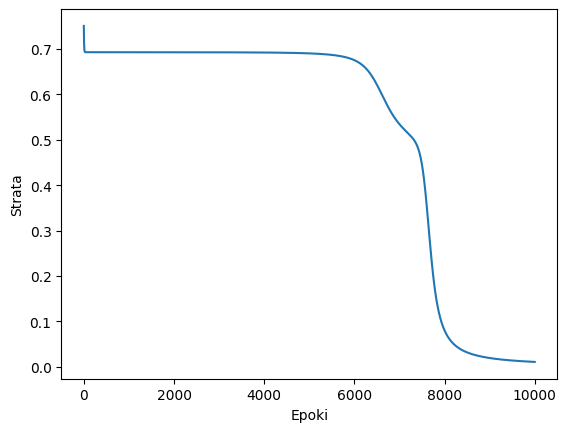

In [16]:
from matplotlib import pyplot as plt

plt.plot(losses)
plt.xlabel("Epoki")
plt.ylabel("Strata")

In [17]:
def predict(W1, b1, W2, b2, W3, b3, test):
    a1, a2, output = forward_propagation(test, W1_1, b1_1, W2_2, b2_2, W3_3, b3_3)
    output_a3 = np.squeeze(output)

    prediction = 1 if output >= 0.5 else 0

    print("Dane:", test.tolist(), "Odpowiedź:", prediction)


In [18]:
test = np.array([[0,0]])
predict(W1_1, b1_1, W2_2, b2_2, W3_3, b3_3, test)
test = np.array([[0,1]])
predict(W1_1, b1_1, W2_2, b2_2, W3_3, b3_3, test)
test = np.array([[1,0]])
predict(W1_1, b1_1, W2_2, b2_2, W3_3, b3_3, test)
test = np.array([[1,1]])
predict(W1_1, b1_1, W2_2, b2_2, W3_3, b3_3, test)

Dane: [[0, 0]] Odpowiedź: 0
Dane: [[0, 1]] Odpowiedź: 1
Dane: [[1, 0]] Odpowiedź: 1
Dane: [[1, 1]] Odpowiedź: 0
